### DESAFIO DSA - PREVENDO A OCORRÊNCIA DE DIABETES

O conjunto de dados é do Instituto Nacional de Diabetes e Doenças Digestivas e Renais (National Institute of Diabete and Digestive and Kidney Diseases). O objetivo é prever com base em medidas de diagnóstico, se um paciente tem diabetes. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são do sexo feminino com pelo menos 21 anos de idade.

Descrição dos Arquivos

dataset_treino.csv - contém o conjunto de dados de treinamento dataset_teste.csv - contém o conjunto de dados de teste sampleSubmission.csv - contém o template para você enviar a sua solução

Descrição dos Campos num_gestacoes - Número de vezes grávida glicose - Concentração plasmática de glicose em teste oral de tolerância à glicose pressao_sanguinea - Pressão arterial diastólica em mm Hg grossura_pele - Espessura da dobra da pele do tríceps em mm insulina - Insulina em mu U / ml bmi - Índice de massa corporal medido em peso em kg / (altura em m) ^ 2 indice_historico - Índice de histórico de diabetes (Pedigree Function) idade - Idade em anos classe - Classe (0 - não desenvolveu a doença / 1 - desenvolveu a doença)

### Importando os arquivos

In [1]:
from pandas import read_csv
arquivo = 'dataset_treino.csv'
df_train = read_csv(arquivo)

In [2]:
from pandas import read_csv
arquivo = 'dataset_teste.csv'
df_test = read_csv(arquivo)

In [3]:
df_test.head(5)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,1,1,108,88,19,0,27.1,0.400,24
1,2,6,96,0,0,0,23.7,0.190,28
2,3,1,124,74,36,0,27.8,0.100,30
3,4,7,150,78,29,126,35.2,0.692,54
4,5,4,183,0,0,0,28.4,0.212,36


In [4]:
df_train.head(5)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


### Análise Exploratória de Dados

In [5]:
# Verificando o tipo de objeto
df_train.dtypes

id                     int64
num_gestacoes          int64
glicose                int64
pressao_sanguinea      int64
grossura_pele          int64
insulina               int64
bmi                  float64
indice_historico     float64
idade                  int64
classe                 int64
dtype: object

In [6]:
# Verificando se há valores nulos
df_train.isnull().values.any()

False

In [7]:
# Outro Método para verificar.
df_train.isnull().sum().sort_values(ascending = False).head(10)

classe               0
idade                0
indice_historico     0
bmi                  0
insulina             0
grossura_pele        0
pressao_sanguinea    0
glicose              0
num_gestacoes        0
id                   0
dtype: int64

In [8]:
# Verificando se há valores faltantes
df_train.count()

id                   600
num_gestacoes        600
glicose              600
pressao_sanguinea    600
grossura_pele        600
insulina             600
bmi                  600
indice_historico     600
idade                600
classe               600
dtype: int64

In [9]:
# Verificando se há valores faltantes
df_train.shape

(600, 10)

In [10]:
# Resumo estatístico. É importante observar aqui a media de idade. Não se preocupar por exemplo com a coluna classe, pois
# como os valores são 0 ou 1 não reflete a distribuição dos dados.
df_train.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Verificando a distribuição das classes na variável target(classe). Desta forma é possível compreender se precisaremos
# fazer um balanceamento. Nitidamente os valores estão desbalanceados a classe 0 tem quase o dobro da classe 1.
df_train.groupby('classe').size()

classe
0    392
1    208
dtype: int64

### Visualizando os dados

In [12]:
# Importando o módulo

import matplotlib.pyplot as plt

# Suprimindo mensagens de Warnings
import warnings
warnings.filterwarnings('ignore')


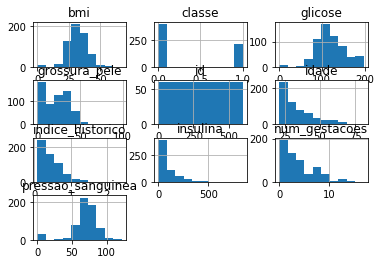

In [13]:
# Histograma. Notar que bmi e pressão sanguinea possuem uma distribuição normal
df_train.hist()
plt.show()

In [14]:
# Verificando a correlação das variáveis
df_train.corr()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
id,1.000000,-0.081928,-0.033261,-0.022520,0.028834,-0.000328,-0.013234,-0.002386,0.008577,-0.091694
num_gestacoes,-0.081928,1.000000,0.139924,0.118589,-0.080628,-0.055261,0.034970,-0.051889,0.532926,0.207922
glicose,-0.033261,0.139924,1.000000,0.143653,0.054515,0.339553,0.216336,0.144771,0.274294,0.449891
pressao_sanguinea,-0.022520,0.118589,0.143653,1.000000,0.197539,0.094150,0.271557,0.008882,0.226710,0.062860
grossura_pele,0.028834,-0.080628,0.054515,0.197539,1.000000,0.428922,0.377854,0.176640,-0.121348,0.075745
insulina,-0.000328,-0.055261,0.339553,0.094150,0.428922,1.000000,0.183903,0.218154,-0.011876,0.145390
bmi,-0.013234,0.034970,0.216336,0.271557,0.377854,0.183903,1.000000,0.127945,0.047187,0.316773
indice_historico,-0.002386,-0.051889,0.144771,0.008882,0.176640,0.218154,0.127945,1.000000,0.033781,0.181741
idade,0.008577,0.532926,0.274294,0.226710,-0.121348,-0.011876,0.047187,0.033781,1.000000,0.210824
classe,-0.091694,0.207922,0.449891,0.062860,0.075745,0.145390,0.316773,0.181741,0.210824,1.000000


In [15]:
# Identificando a correlação entre as variáveis de forma gráfica
def correl_plot(df_train, size = 20):
    corr = df_train.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

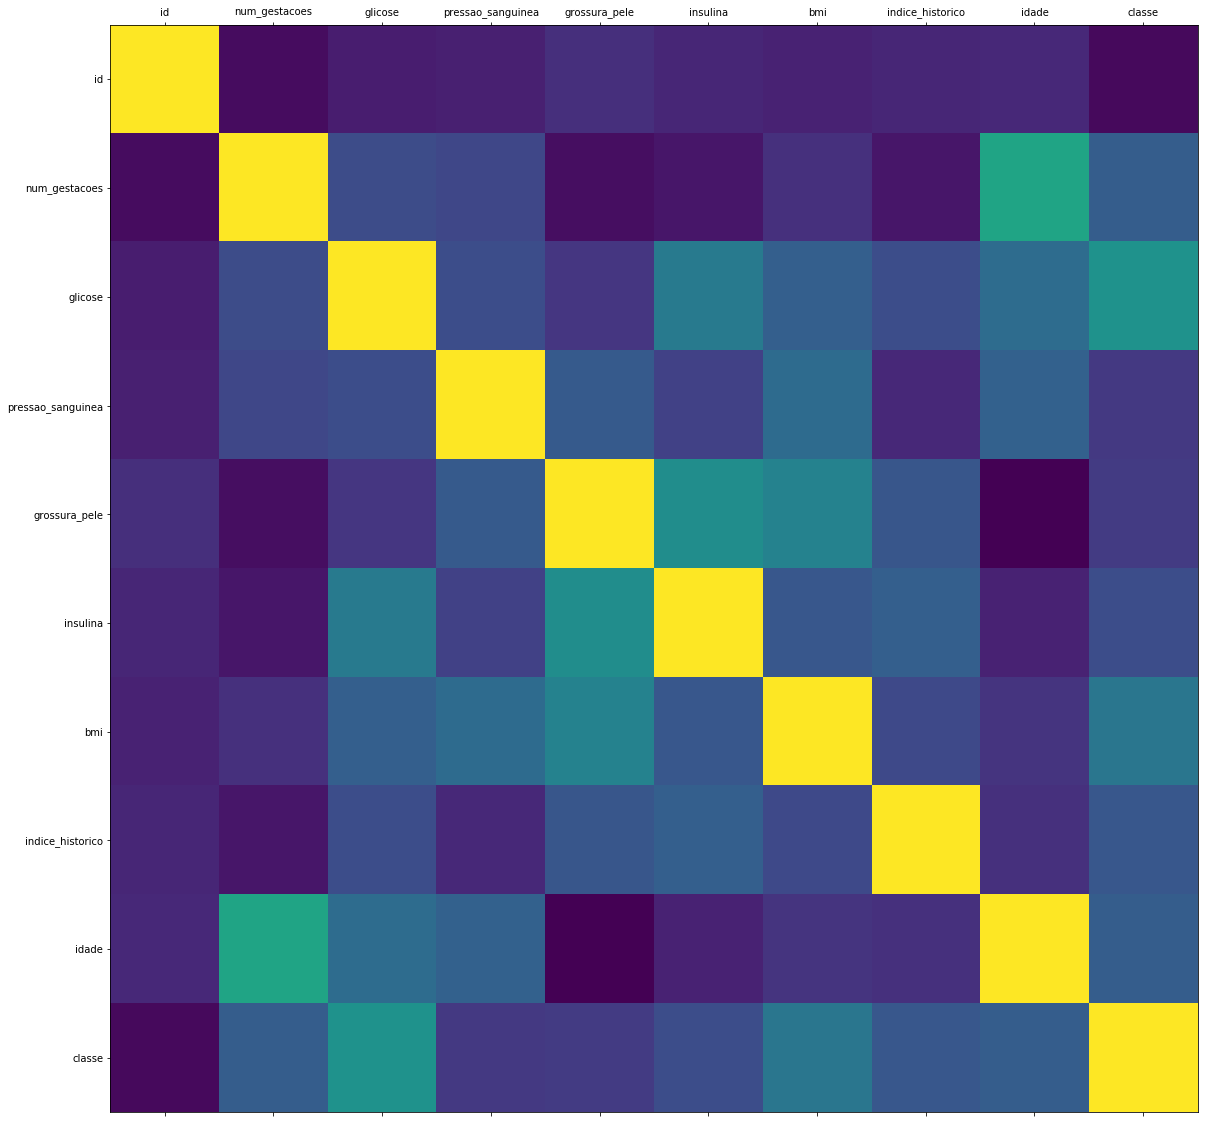

In [16]:
correl_plot(df_train)

### Visualização com Seaborn

In [17]:
# Importando o pacote
import seaborn as sns

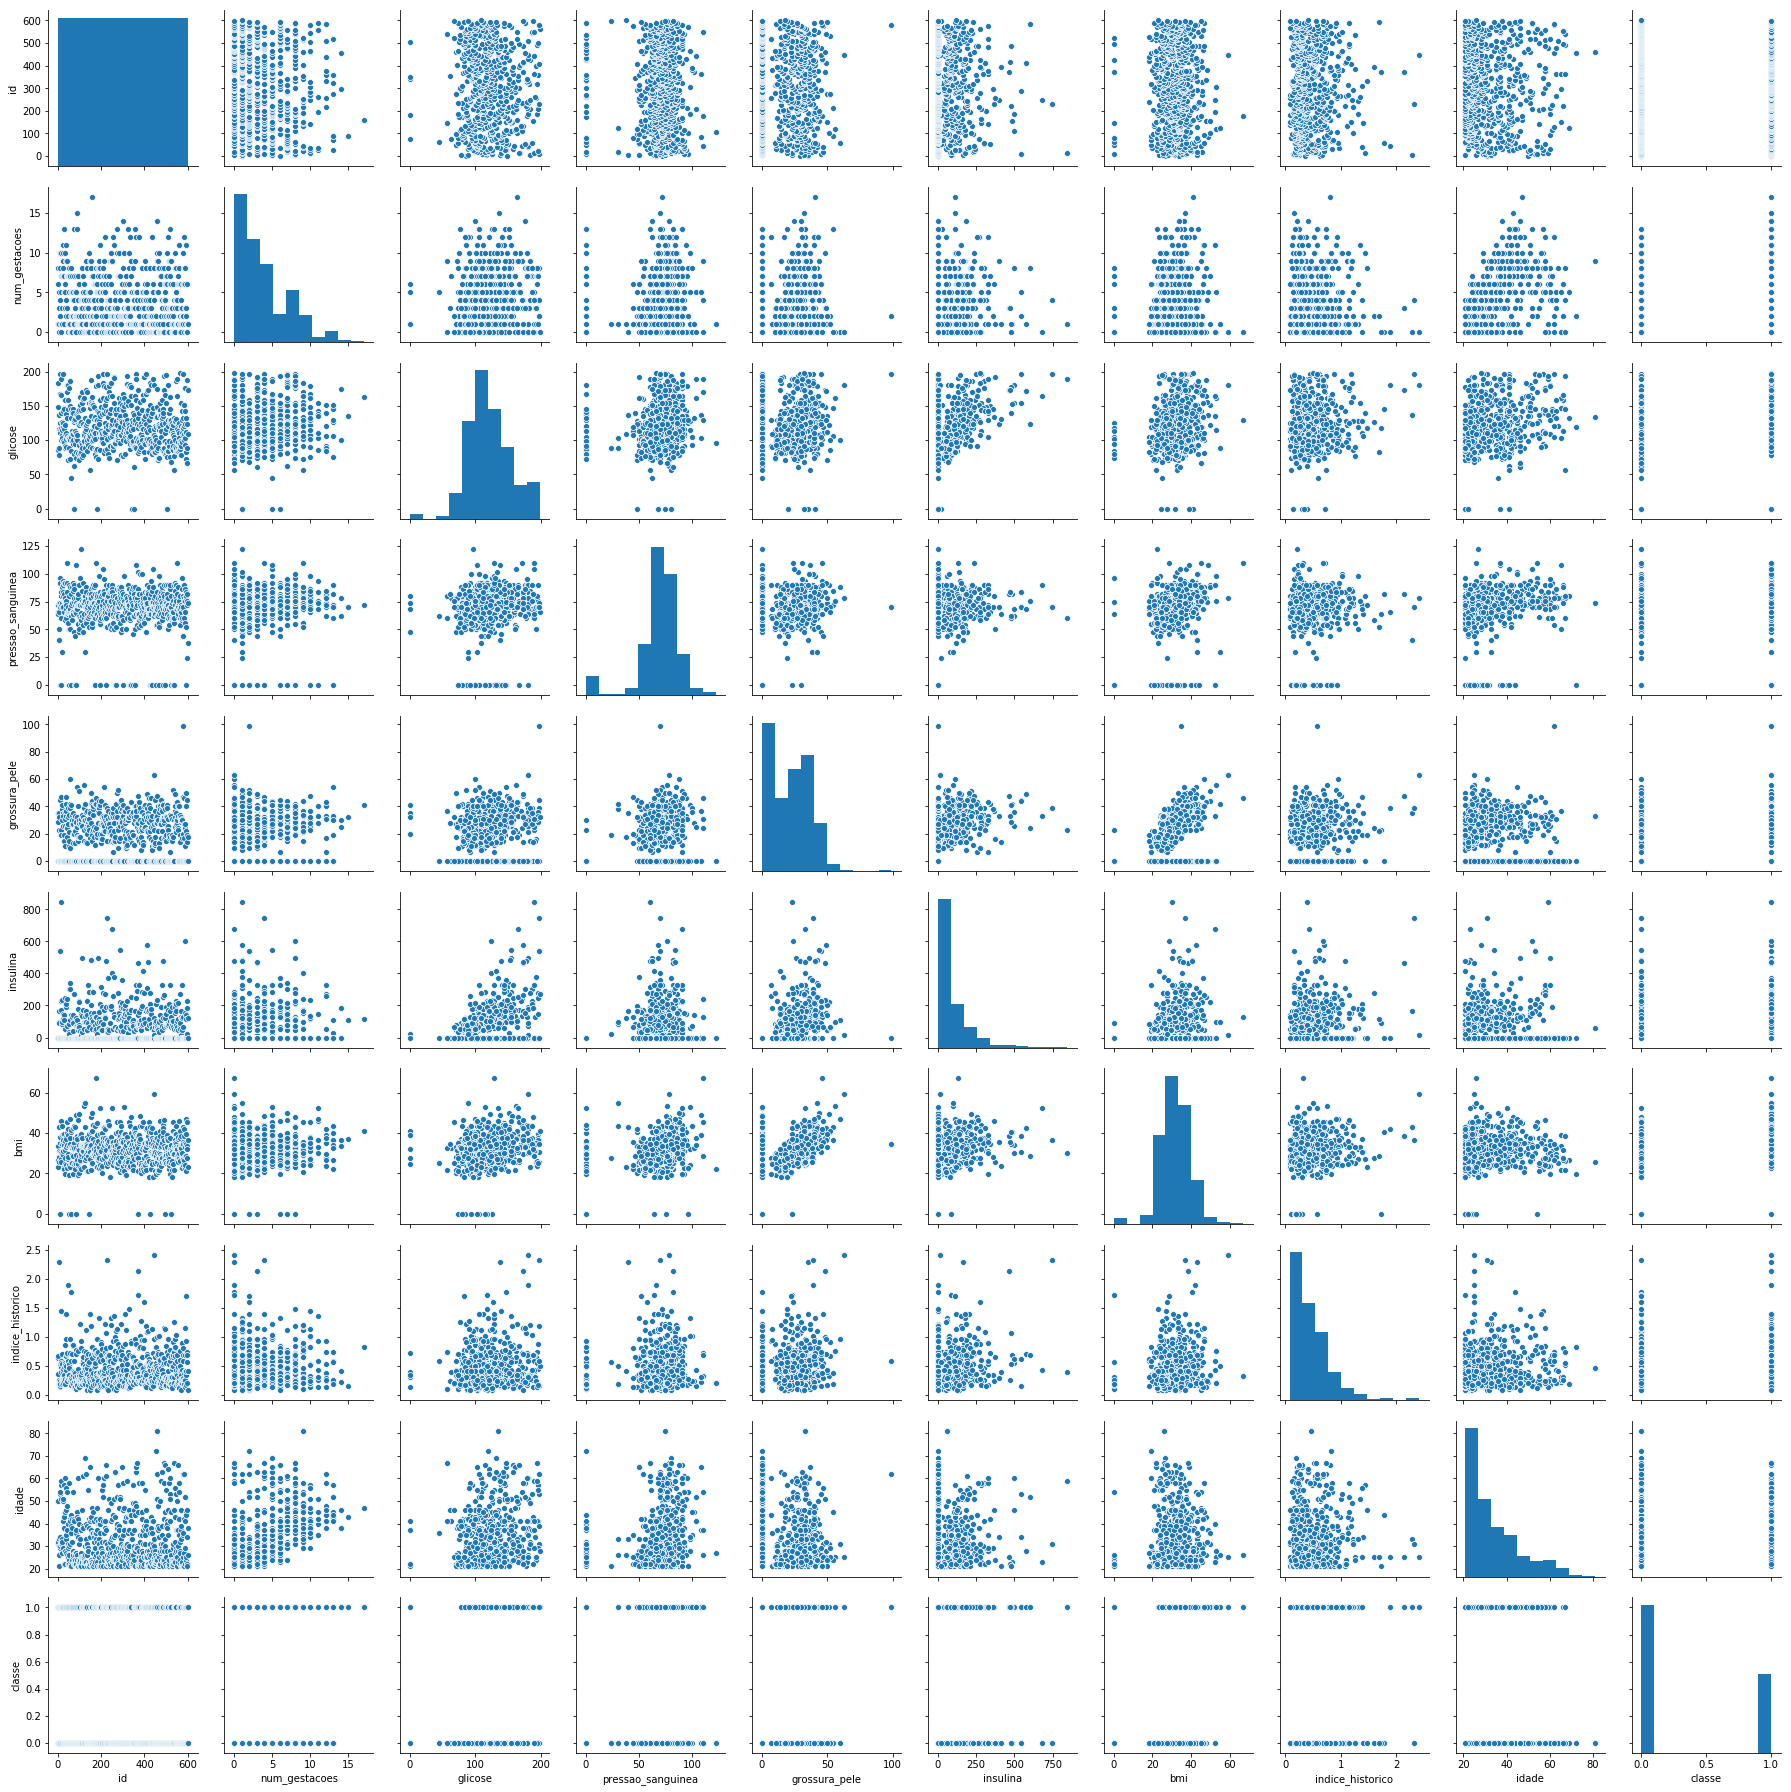

In [18]:
sns.pairplot(df_train)

### Pré Processamento dos Dados

In [ ]:
# Nesta etapa se aplica escala, padronização, seleção de variáveis e diversas outros métodos para deixar o dataset mais
# receptivo aos modelos de MAchine Learning.

In [19]:
# Importando o módulo do Sklearn
from sklearn.preprocessing import MinMaxScaler

# Separação do array em componentes de input e output
array = df_train.values
x = array[:,0:8]
y = array[:,9]

# Criação do Modelo
escala = MinMaxScaler(feature_range = (0 ,1))
escalax = escala.fit_transform(x)

# Print dos Resultados(5 primeiras linhas de todas as colunas)
print(escalax[0:5,:])

[[0.         0.35294118 0.74747475 0.59016393 0.35353535 0.
  0.50074516 0.23441503]
 [0.00166945 0.05882353 0.42929293 0.54098361 0.29292929 0.
  0.39642325 0.11656704]
 [0.0033389  0.47058824 0.92424242 0.52459016 0.         0.
  0.34724292 0.25362938]
 [0.00500835 0.05882353 0.44949495 0.54098361 0.23232323 0.11111111
  0.41877794 0.03800171]
 [0.0066778  0.         0.69191919 0.32786885 0.35353535 0.19858156
  0.64232489 0.94363792]]


In [20]:
# Padronização
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Importando o módulo

from sklearn.preprocessing import StandardScaler


# Separação do array em componentes de input e output
array = df_train.values

# Separando o array em componentes de input e output
x = array[:,0:8]
y = array[:,9]

# Gerando o novo padrão
escala = StandardScaler().fit(x)
escalaxnew = escala.transform(x)

# Sumarizando os dados transformados
print(escalaxnew[0:5,:])


[[-1.72916646  0.64896283  0.85394206  0.17154252  0.90309831 -0.68327145
   0.21175498  0.43304279]
 [-1.72339295 -0.83948403 -1.0767362  -0.13862979  0.52789301 -0.68327145
  -0.66292137 -0.38594131]
 [-1.71761944  1.24434157  1.92654109 -0.24202057 -1.28559926 -0.68327145
  -1.07526879  0.56657281]
 [-1.71184593 -0.83948403 -0.95415345 -0.13862979  0.15268771  0.12433401
  -0.47549072 -0.93193072]
 [-1.70607242 -1.1371734   0.5168395  -1.48270984  0.90309831  0.76010853
   1.39881574  5.36178409]]


In [21]:
# Retirar a coluna ID, pois esta não contribui para saber se uma pessoa terá ou não diabetes. Não vou exclui-la, pois 
# posteriormente para o envio ao Kaggle
df_train = df_train.drop(['id'], axis=1) # não apliquei inplace = TRUE

In [22]:
# Visualizando as 5 primeiras linhas
df_train.head(5)

,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# Separando as features e target para criação do modelo
x_treino3 = df_train.drop('classe', axis = 1)
y_treino3 = df_train['classe']
x_teste3 = df_test.drop("id", axis=1).copy()

### CRIAÇÃO DO MODELO Desicion Tree

In [24]:
# Importando o módulo
from sklearn.tree import DecisionTreeClassifier

In [25]:
dectree = DecisionTreeClassifier()
dectree.fit(x_treino3, y_treino3)
dectree_pred = dectree.predict(x_teste3)
acuracia = round(dectree.score(x_treino3, y_treino3)* 100, 2)
print(round(acuracia, 2), "%")


100.0 %


### Enviando o resultado para o Kaggle

In [26]:
import pandas as pd

In [27]:
submeter = pd.DataFrame({
        'id': df_test['id'],
        'classe': dectree_pred
    })
submeter.to_csv('submission5.csv', index=False)

### FIM

In [28]:
arquivo3 = 'submission5.csv'
df = read_csv(arquivo3)

In [29]:
df

,id,classe
0,1,0
1,2,0
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,0
8,9,0
9,10,0


In [30]:
import numpy as np
print( np.unique(dectree_pred ) )

[0 1]
